# Crop Data Prepartion 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop = pd.read_csv('../Datasets/cpdata.csv')

In [3]:
crop.head(10)

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
5,23.058049,83.370118,7.073454,251.055000,rice
6,22.708838,82.639414,5.700806,271.324860,rice
7,20.277744,82.894086,5.718627,241.974195,rice
8,24.515881,83.535216,6.685346,230.446236,rice
9,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
fert= pd.read_csv('../Datasets/Fertilizer.csv')

In [5]:
fert.head(10)

,Unnamed: 0,Crop,N,P,K,pH
0,0,Rice,80,40,40,5.5
1,1,Jowar(Sorghum),80,40,40,5.5
2,2,Barley(JAV),70,40,45,5.5
3,3,Maize,80,40,20,5.5
4,4,Ragi( naachnnii),50,40,20,5.5
5,5,Chickpeas(Channa),40,60,80,5.5
6,6,French Beans(Farasbi),90,125,60,5.0
7,7,Fava beans (Papdi - Val),90,125,60,5.0
8,8,Lima beans(Pavta),40,60,20,5.0
9,9,Cluster Beans(Gavar),25,50,25,5.0


In [6]:
def changecase(i):
    i = i.replace(" ","")
    i = i.lower()
    return i

In [7]:
fert['Crop'] = fert['Crop'].apply(changecase)
crop['label'] = crop['label'].apply(changecase)

In [8]:
crop_names = crop.label.unique()

In [9]:
del fert['Unnamed: 0']

In [10]:
crop_names_from_fert = fert['Crop'].unique()

In [11]:
crop_names_from_fert

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpeas(channa)', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans',
       'pigeonpeas(toordal)', 'mothbean(matki)', 'mungbeans', 'greenpeas',
       'horsegram(kulthi)', 'blackgram', 'rapeseed(mohri)',
       'corianderseeds', 'mustardseeds', 'sesameseed', 'cuminseeds',
       'lentils(masoordal)', 'brinjal', 'beetroot', 'bittergourd',
       'bottlegourd', 'capsicum', 'cabbage', 'carrot', 'cauliflower',
       'cucumber', 'corianderleaves', 'curryleaves', 'drumstick–moringa',
       'chili', 'ladyfinger', 'mushroom', 'onion', 'potato', 'pumpkin',
       'radish', 'olive', 'sweetpotato', 'fenugreekleaf(methi)',
       'spinach', 'ridgegourd', 'gooseberry(amla)',
       'jambun(syzygiumcumini)', 'ziziphusmauritiana(bor)',
       'garciniaindica(kokam)', 'tamarind', 'tapioca(suran)', 'garlic',
  

In [12]:
for i in crop_names_from_fert:
    print(crop[crop['label'] == i])

    temperature   humidity        ph    rainfall label
0     20.879744  82.002744  6.502985  202.935536  rice
1     21.770462  80.319644  7.038096  226.655537  rice
2     23.004459  82.320763  7.840207  263.964248  rice
3     26.491096  80.158363  6.980401  242.864034  rice
4     20.130175  81.604873  7.628473  262.717340  rice
..          ...        ...       ...         ...   ...
95    22.683191  83.463583  6.604993  194.265172  rice
96    21.533463  82.140041  6.500343  295.924880  rice
97    21.408658  83.329319  5.935745  287.576694  rice
98    26.543481  84.673536  7.072656  183.622266  rice
99    23.359054  83.595123  5.333323  188.413665  rice

[100 rows x 5 columns]
Empty DataFrame
Columns: [temperature, humidity, ph, rainfall, label]
Index: []
Empty DataFrame
Columns: [temperature, humidity, ph, rainfall, label]
Index: []
     temperature   humidity        ph    rainfall  label
500    22.613600  63.690706  5.749914   87.759539  maize
501    26.100184  71.574769  6.931757  102

In [13]:
crop.label

0             rice
1             rice
2             rice
3             rice
4             rice
           ...    
3095    watermelon
3096    watermelon
3097    watermelon
3098    watermelon
3099    watermelon
Name: label, Length: 3100, dtype: object

In [14]:
extract_labels = []
for i in crop_names_from_fert:
    if i in crop_names:
        extract_labels.append(i)

In [15]:
#use extract labesl on crop to get all the data related to those labels
new_crop = pd.DataFrame(columns = crop.columns)
new_fert = pd.DataFrame(columns = fert.columns)

In [16]:
for label in extract_labels:
    new_crop = new_crop.append(crop[crop['label'] == label])

In [17]:
for label in extract_labels:
    new_fert = new_fert.append(fert[fert['Crop'] == label].iloc[0])

In [18]:
 new_crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
895,26.774637,66.413269,6.780064,177.774507,coffee
896,27.417112,56.636362,6.086922,127.924610,coffee
897,24.131797,67.225123,6.362608,173.322839,coffee
898,26.272418,52.127394,6.758793,127.175293,coffee


In [19]:
new_fert

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
3,maize,80,40,20,5.5
12,kidneybeans,20,60,20,5.5
18,blackgram,40,60,20,5.0
60,pomegranate,20,10,40,5.5
61,banana,100,75,50,6.5
62,mango,20,20,30,5.0
63,grapes,20,125,200,4.0
66,watermelon,100,10,50,5.5
67,muskmelon,100,10,50,5.5


In [20]:
new_crop.to_csv('../Datasets/MergeFileCrop.csv')
new_fert.to_csv('../Datasets/FertilizerData.csv')

In [21]:
#Here the new data files created 

In [22]:
merge_fert = pd.read_csv('../Datasets/FertilizerData.csv')

In [23]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,12,kidneybeans,20,60,20,5.5
3,18,blackgram,40,60,20,5.0
4,60,pomegranate,20,10,40,5.5


In [24]:
del merge_fert['Unnamed: 0']

In [25]:
merge_fert.describe()

,N,P,K,pH
count,17.000000,17.000000,17.000000,17.000000
mean,58.235294,43.823529,52.941176,5.382353
std,37.788109,36.764853,56.763182,0.673828
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,10.000000,20.000000,5.000000
50%,50.000000,40.000000,40.000000,5.500000
75%,100.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


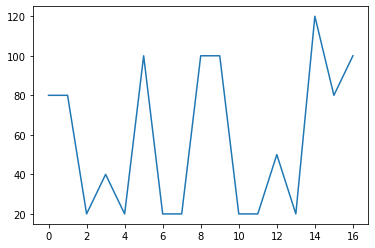

In [26]:
plt.plot(merge_fert["N"])

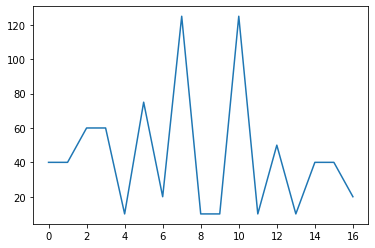

In [27]:
plt.plot(merge_fert["P"])

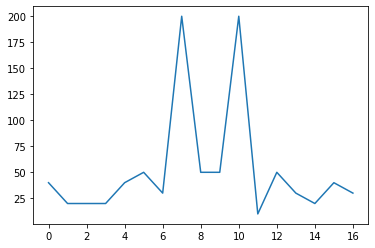

In [28]:
plt.plot(merge_fert["K"])

<AxesSubplot:>

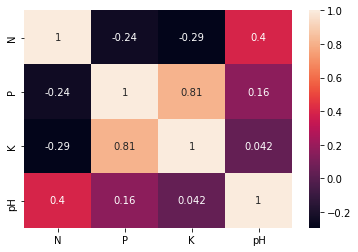

In [29]:
sns.heatmap(merge_fert.corr(),annot=True)

In [30]:
merge_crop = pd.read_csv('../Datasets/MergeFileCrop.csv')
reco_fert = merge_fert

In [31]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [32]:
temp

,N,P,K
0,66,57,44
1,70,60,36
2,99,56,37
3,100,40,36
4,68,54,45
...,...,...,...
1695,111,24,30
1696,119,28,31
1697,80,31,33
1698,83,18,27


In [33]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [34]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,66,57,44
1,1,21.770462,80.319644,7.038096,226.655537,rice,70,60,36
2,2,23.004459,82.320763,7.840207,263.964248,rice,99,56,37
3,3,26.491096,80.158363,6.980401,242.864034,rice,100,40,36
4,4,20.130175,81.604873,7.628473,262.717340,rice,68,54,45
...,...,...,...,...,...,...,...,...,...
1695,895,26.774637,66.413269,6.780064,177.774507,coffee,111,24,30
1696,896,27.417112,56.636362,6.086922,127.924610,coffee,119,28,31
1697,897,24.131797,67.225123,6.362608,173.322839,coffee,80,31,33
1698,898,26.272418,52.127394,6.758793,127.175293,coffee,83,18,27


In [35]:
del merge_crop['Unnamed: 0']

In [36]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,66,57,44
1,21.770462,80.319644,7.038096,226.655537,rice,70,60,36
2,23.004459,82.320763,7.840207,263.964248,rice,99,56,37
3,26.491096,80.158363,6.980401,242.864034,rice,100,40,36
4,20.130175,81.604873,7.628473,262.717340,rice,68,54,45
...,...,...,...,...,...,...,...,...
1695,26.774637,66.413269,6.780064,177.774507,coffee,111,24,30
1696,27.417112,56.636362,6.086922,127.924610,coffee,119,28,31
1697,24.131797,67.225123,6.362608,173.322839,coffee,80,31,33
1698,26.272418,52.127394,6.758793,127.175293,coffee,83,18,27


In [37]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [38]:
merge_crop.to_csv("../Datasets/FinalData.csv",index=False)

In [39]:
df = pd.read_csv('../Datasets/FinalData.csv')

In [40]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,66,57,44,20.879744,82.002744,6.502985,202.935536,rice
1,70,60,36,21.770462,80.319644,7.038096,226.655537,rice
2,99,56,37,23.004459,82.320763,7.840207,263.964248,rice
3,100,40,36,26.491096,80.158363,6.980401,242.864034,rice
4,68,54,45,20.130175,81.604873,7.628473,262.717340,rice


In [41]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

# training part

In [42]:
df = pd.read_csv('../Datasets/FinalData.csv')

In [43]:
df.size

13600

In [44]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,66,57,44,20.879744,82.002744,6.502985,202.935536,rice
1,70,60,36,21.770462,80.319644,7.038096,226.655537,rice
2,99,56,37,23.004459,82.320763,7.840207,263.964248,rice
3,100,40,36,26.491096,80.158363,6.980401,242.864034,rice
4,68,54,45,20.130175,81.604873,7.628473,262.717340,rice


In [45]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [46]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [47]:
acc = []
model = []

In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [49]:
from sklearn.linear_model import LogisticRegression #logistic Regression 

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100,"%")

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  96.76470588235294 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        23
   blackgram       0.96      0.96      0.96        24
     coconut       1.00      1.00      1.00        22
      coffee       0.95      0.95      0.95        19
      cotton       0.91      1.00      0.95        21
      grapes       1.00      1.00      1.00        13
        jute       0.71      0.92      0.80        13
 kidneybeans       1.00      0.95      0.97        20
       maize       0.95      0.90      0.92        20
       mango       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        28
 pomegranate       1.00      1.00      1.00        17
        rice       0.94      0.75      0.83        20
  watermelon       1.00  

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

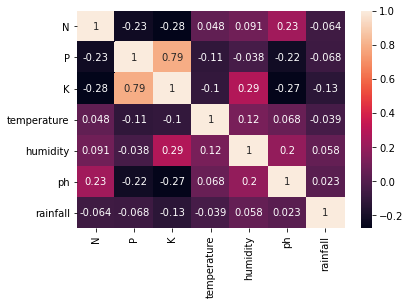

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100,"%")

print(classification_report(Ytest,predicted_values))


DecisionTrees's Accuracy is:  96.76470588235294 %
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        23
   blackgram       1.00      0.92      0.96        24
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        13
        jute       0.60      0.92      0.73        13
 kidneybeans       1.00      1.00      1.00        20
       maize       0.91      1.00      0.95        20
       mango       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        22
      papaya       1.00      0.96      0.98        28
 pomegranate       1.00      1.00      1.00        17
        rice       0.93      0.65      0.76        20
  watermelon       1.00      1.

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

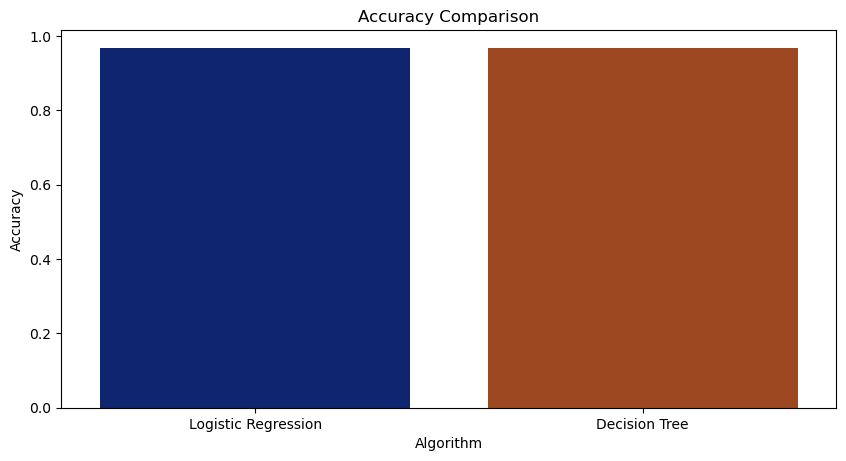

In [52]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')